In [1]:
import numpy as np
import pandas as pd

filepath = '/Users/shamanthk/Documents/iomics/DoWhy-attribution/datasets/sachs.2005.continuous.txt'
df = pd.read_csv(filepath, sep='\t')
df

,raf,mek,plc,pip2,pip3,erk,akt,pka,pkc,p38,jnk
0,26.4,13.20,8.82,18.30,58.80,6.61,17.0,414.0,17.00,44.90,40.00
1,35.9,16.50,12.30,16.80,8.13,18.60,32.5,352.0,3.37,16.50,61.50
2,59.4,44.10,14.60,10.20,13.00,14.90,32.5,403.0,11.40,31.90,19.50
3,73.0,82.80,23.10,13.50,1.29,5.83,11.8,528.0,13.70,28.60,23.10
4,33.7,19.80,5.19,9.73,24.80,21.10,46.1,305.0,4.66,25.70,81.30
...,...,...,...,...,...,...,...,...,...,...,...
7461,49.1,12.40,32.80,27.90,22.70,11.70,38.2,1144.0,1.00,2.55,1.00
7462,23.3,4.61,17.80,22.10,14.90,48.70,67.3,922.0,1.00,9.82,1.00
7463,28.1,4.49,18.80,20.20,10.20,3.08,21.9,730.0,1.00,1.75,2.00
7464,34.6,7.10,5.73,20.70,15.10,32.20,41.4,813.0,44.50,1382.00,2.44


In [2]:
anomalous_df = pd.read_csv('anamoulous_data.csv', index_col='index')
anomalous_df = anomalous_df.reset_index(drop=True)
anomalous_df

,raf,mek,plc,pip2,pip3,erk,akt,pka,pkc,p38,jnk,anomaly
0,2890.0,4451.0,698.0,1263.0,157.0,55.2,365.0,13.60,1186.0,6153.0,1134.0,-1
1,122.0,209.0,965.0,1540.0,10.3,160.0,882.0,55.20,799.0,4105.0,2227.0,-1
2,538.0,764.0,2267.0,3619.0,91.4,82.0,474.0,23.70,679.0,3555.0,1176.0,-1
3,196.0,334.0,2666.0,4740.0,184.0,93.9,519.0,9.22,717.0,3555.0,3398.0,-1


In [3]:
from dowhy import CausalModel

model_est=CausalModel(
        data = df,
        treatment='SMOKING',
        outcome='LUNG_CANCER',
        graph='pc.gml')

/Users/shamanthk/.pyenv/versions/3.10.14/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data = df.to_numpy()
data

array([[2.640e+01, 1.320e+01, 8.820e+00, ..., 1.700e+01, 4.490e+01,
        4.000e+01],
       [3.590e+01, 1.650e+01, 1.230e+01, ..., 3.370e+00, 1.650e+01,
        6.150e+01],
       [5.940e+01, 4.410e+01, 1.460e+01, ..., 1.140e+01, 3.190e+01,
        1.950e+01],
       ...,
       [2.810e+01, 4.490e+00, 1.880e+01, ..., 1.000e+00, 1.750e+00,
        2.000e+00],
       [3.460e+01, 7.100e+00, 5.730e+00, ..., 4.450e+01, 1.382e+03,
        2.440e+00],
       [3.050e+01, 1.010e+00, 7.300e+00, ..., 1.000e+00, 1.000e+00,
        1.650e+00]])

In [5]:
import networkx as nx
predicted_graph_pc = nx.read_gml('pc.gml')

In [6]:
from dowhy import gcm
causal_model = gcm.InvertibleStructuralCausalModel(predicted_graph_pc)
auto_assignment_summary = gcm.auto.assign_causal_mechanisms(causal_model, df, override_models=True, quality=gcm.auto.AssignmentQuality.GOOD)


In [7]:
gcm.fit(causal_model, df)

Fitting causal mechanism of node jnk: 100%|██████████| 11/11 [00:00<00:00, 11.31it/s]


Evaluating causal mechanisms...: 100%|██████████| 11/11 [00:00<00:00, 323.72it/s]
/Users/shamanthk/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/shamanthk/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/shamanthk/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/shamanthk/.pyenv/versions/3.10.14/lib/pyt

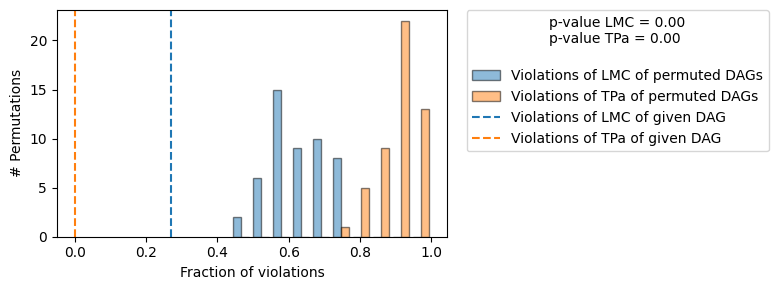

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

In [8]:
print(gcm.evaluate_causal_model(causal_model, df))

In [9]:
anomalous_df

,raf,mek,plc,pip2,pip3,erk,akt,pka,pkc,p38,jnk,anomaly
0,2890.0,4451.0,698.0,1263.0,157.0,55.2,365.0,13.60,1186.0,6153.0,1134.0,-1
1,122.0,209.0,965.0,1540.0,10.3,160.0,882.0,55.20,799.0,4105.0,2227.0,-1
2,538.0,764.0,2267.0,3619.0,91.4,82.0,474.0,23.70,679.0,3555.0,1176.0,-1
3,196.0,334.0,2666.0,4740.0,184.0,93.9,519.0,9.22,717.0,3555.0,3398.0,-1


In [19]:
anomalous_df.iloc[0]['p38']-df['p38'].mean()

In [11]:
anomalous_df = anomalous_df.drop([1,2,3])

In [21]:
gcm.config.disable_progress_bars() # to disable print statements when computing Shapley values

median_attribs, uncertainty_attribs = gcm.confidence_intervals(
    gcm.fit_and_compute(gcm.attribute_anomalies,
                        causal_model,
                        df,
                        target_node='p38',
                        anomaly_samples=anomalous_df),
    num_bootstrap_resamples=100)

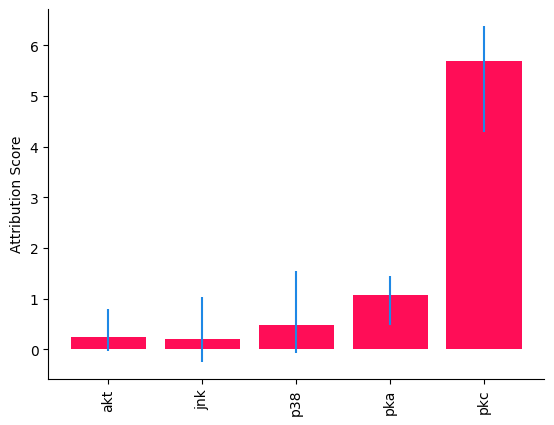

In [23]:
gcm.util.plotting.bar_plot(median_attribs, uncertainty_attribs, 'Attribution Score')

These results indicate that the outlier we see in the measurement for p38 is highly driven by pkc. This does make sense from our discovered causal graph.

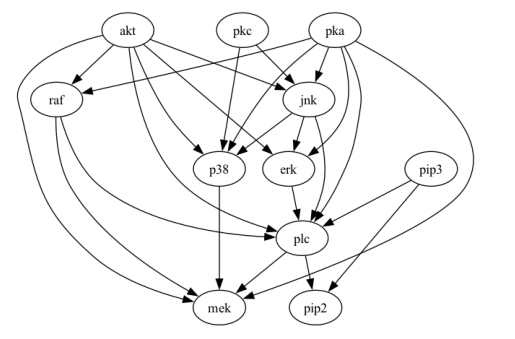

In [25]:
from dowhy.utils import plot

plot(predicted_graph_pc)